# Lab 2 : image restoration, image compression

In this lab, you will apply some standard filters to locally detect features. You will then see two important problems in image processing : restoration and compression.

This lab session is graded, here are the guidelines
- Work alone or by pair
- Upload you notebook on LMS, save the entries
- Deadline: Sept 28th

## 1. Image denoising

Image denoising is an ubiquitous task in image processing, because image acquisition is always disturbed by random perurbations called **noise**. There are many kinds of noise, see for instance [this introduction on Wikipedia](https://en.wikipedia.org/wiki/Image_noise). 

We will here consider successfully :
- salt and pepper noise, which models defects in some sensor cells,
- Gaussian noise, which is the most common model,
- and Poisson-Gaussian noise, which is more realistic for many imaging modalities, including satellite imagery

### Salt-and-pepper noise
Execute the following cell which simulates such impulsive noise, and remove it with median filtering. To evaluate the quality of the denoising, we will use two common metrics: PSNR and SSIM. 


PSNR in: 22.36145202048103  SSIM in: 0.6082135232077188
PSNR out: 33.796250705993984  SSIM out: 0.9331591838408234


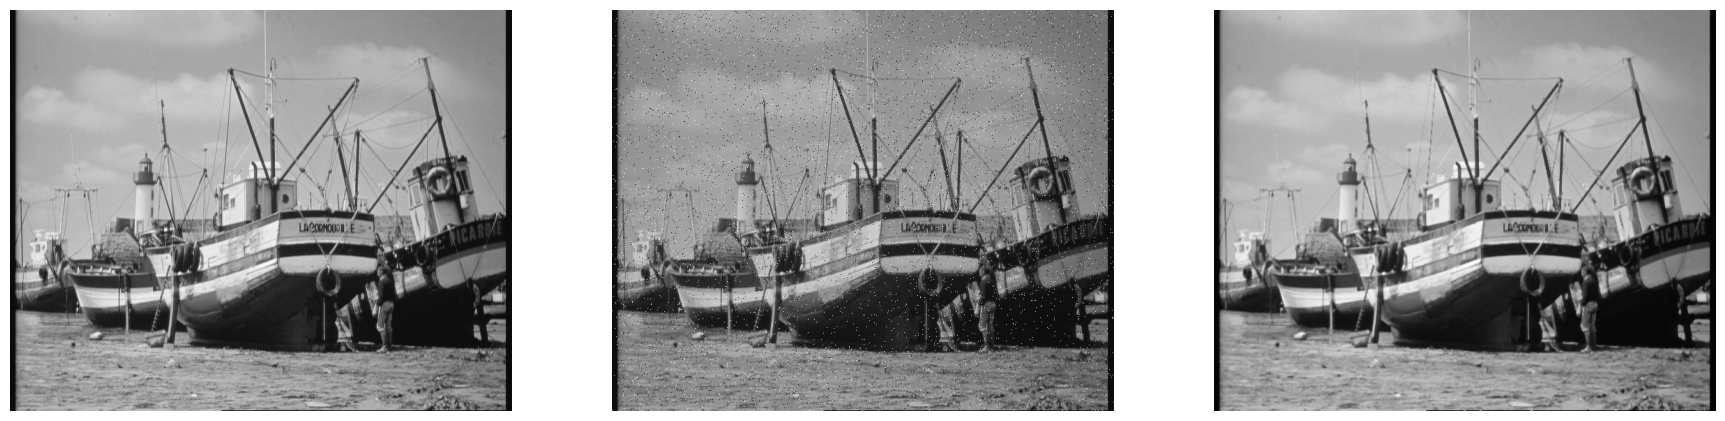

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.io as io
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.filters import median

# Read the image
img = io.imread( 'boats.bmp' )
len = np.size(img)

# Simulate salt and pepper noise
p = 0.01 # percentage of each
_idx = np.random.sample(img.shape) #uniform rand

img_noisy = img
# salt
img_noisy = np.where(_idx > 1.-p, 255, img)
# pepper pixels
img_noisy = np.where(_idx < p, 0, img_noisy)


# Apply median filtering
img_denoised = median(img_noisy, np.ones((3, 3)))

# Display
fig, axes = plt.subplots(ncols=3, figsize=(22,8))
axes[0].imshow(np.uint8(img), cmap=plt.get_cmap('gray'))
axes[1].imshow(np.uint8(img_noisy), cmap=plt.get_cmap('gray'))
axes[2].imshow(np.uint8(img_denoised), cmap=plt.get_cmap('gray'))

# Turn off axes for all subplots
p = [axi.set_axis_off() for axi in axes.ravel()]

# Get metrics
print('PSNR in: ' + str(psnr(img,img_noisy)) + '  SSIM in: ' +  str(ssim(img,img_noisy)))
print('PSNR out: ' + str(psnr(img,img_denoised)) + '  SSIM out: ' + str(ssim(img,img_denoised)))

Text(0.5, 1.0, 'Evolution du SIM en fonction de la taille du kernel')

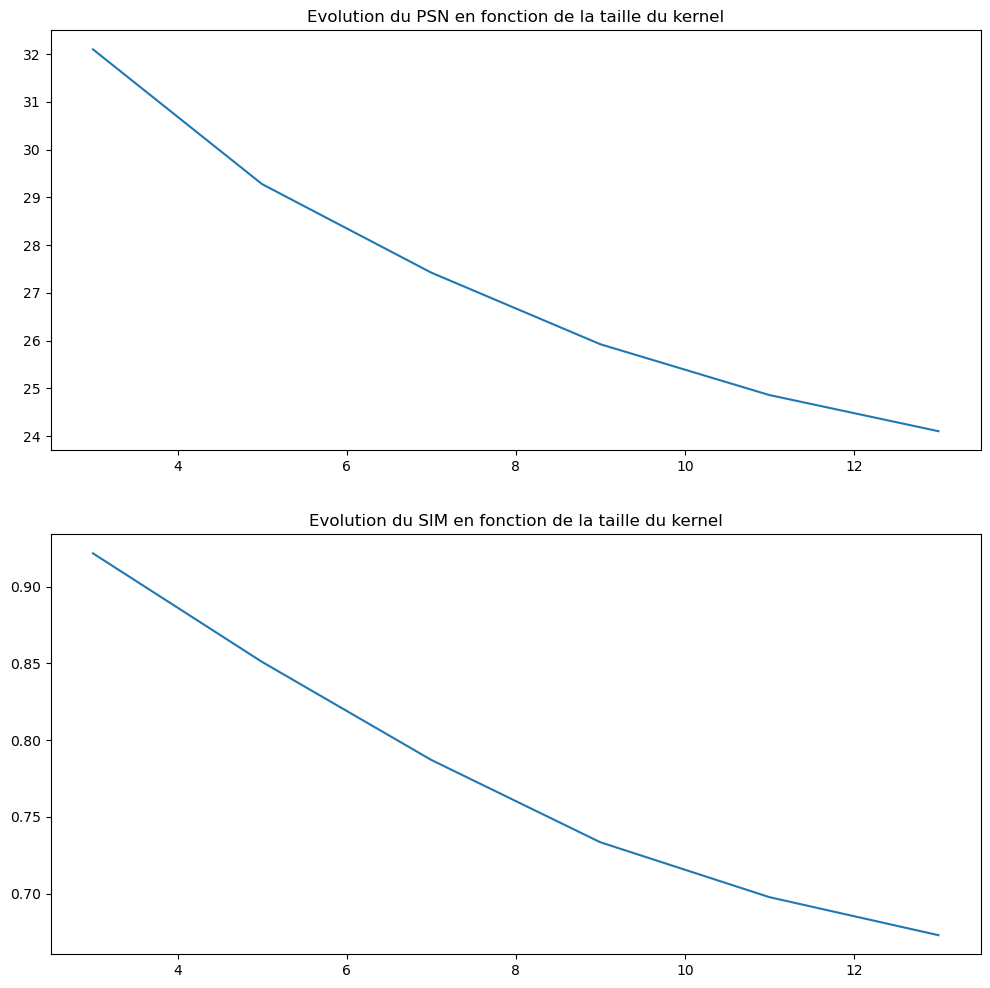

In [ ]:
img = io.imread( 'boats.bmp' )
# Simulate salt and pepper noise
p = 0.05 # percentage of each 

# => On observe que pour un petit bruit (0<p<0.05) , la taille optimale du kernel est de 3x3. Plus on augmente le bruit, plus la taille du kernel doit être grand.

_idx = np.random.sample(img.shape) #uniform rand

img_noisy = img
# salt
img_noisy = np.where(_idx > 1.-p, 255, img)
# pepper pixels
img_noisy = np.where(_idx < p, 0, img_noisy)

#kernel size
kernel_size = [i for i in range(3,15,2)]
psn = []
sim_2 = []

for i in kernel_size:
    img_denoised = median(img_noisy, np.ones((i, i)))
    psn.append(psnr(img,img_denoised))
    sim_2.append(ssim(img,img_denoised))

#Display psn and sim optimum 
fig, ax = plt.subplots(nrows=2,ncols=1,figsize = (12,12))
ax[0].plot(kernel_size,psn)
ax[0].set_title("Evolution du PSN en fonction de la taille du kernel")

ax[1].plot(kernel_size,sim_2)
ax[1].set_title("Evolution du SIM en fonction de la taille du kernel")



<span style='color:red'><b>Exercise 1:</b></span> what is the optimal width of the filter, for a given value of p? Plot the PSNR and SSIM as a function of this width, conclude.

### Gaussian noise

We will now consider white Gaussian noise, a model commonly used in image processing. Be careful, we now need to work with floats !

The noisy image can be written $y=x+n$, with $n\sim\mathcal{N}(0,\sigma^2)$.

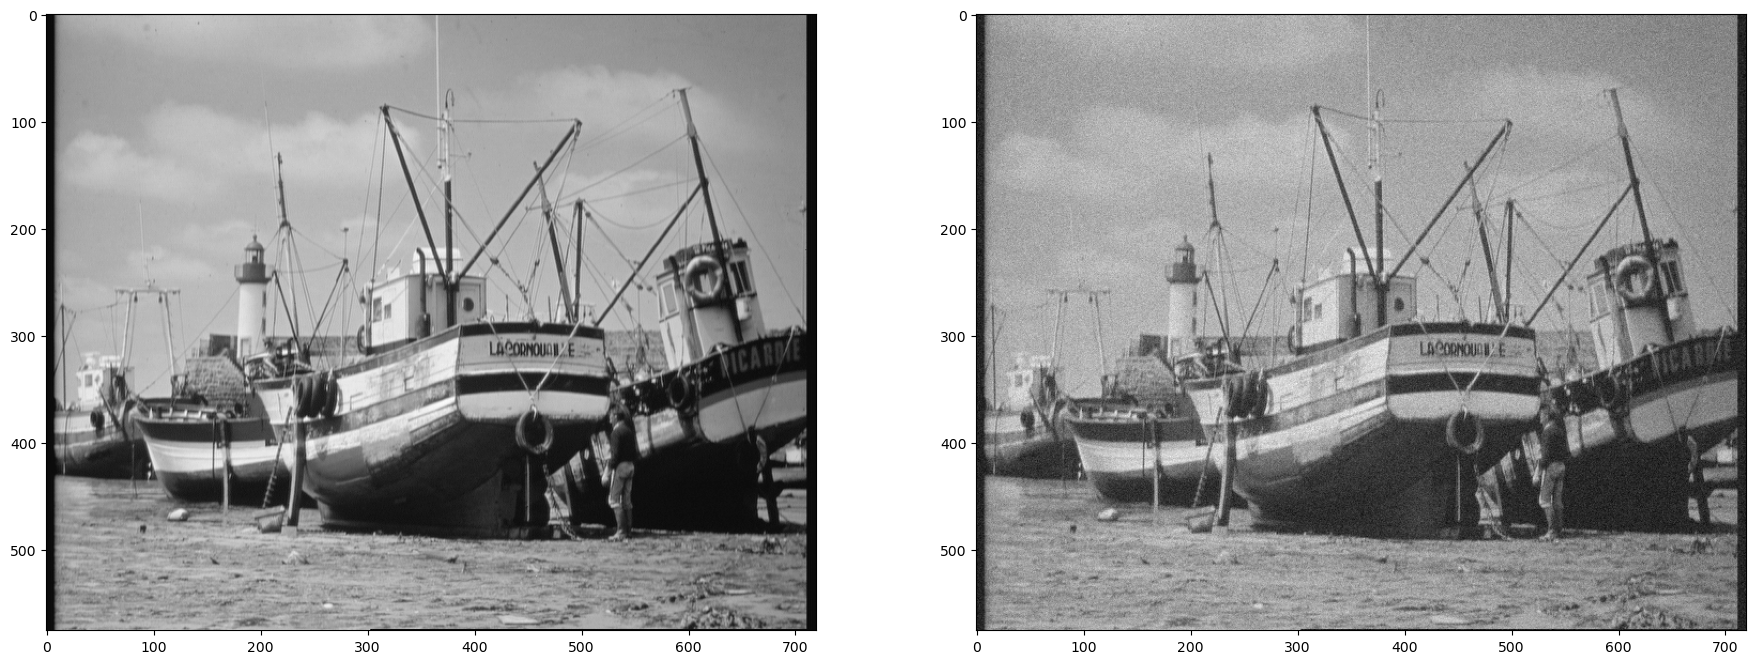

In [11]:
# Read the image
img = io.imread( 'boats.bmp' )
img = img * 1.
sigma = 10.
img_noisy = img + sigma * np.random.randn(*img.shape)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(22,8))

axes[0].imshow(img, cmap=plt.get_cmap('gray'))
axes[1].imshow(img_noisy, cmap=plt.get_cmap('gray'))

<span style='color:red'><b>Exercise 2:</b></span> 
- Try median filtering, then low-pass filtering. Are those techniques efficient?
- Try [bilateral filtering](https://scikit-image.org/docs/stable/api/skimage.restoration.html#skimage.restoration.denoise_bilateral), why does it work better?
- Try [non-local means](https://scikit-image.org/docs/stable/api/skimage.restoration.html#skimage.restoration.denoise_nl_means), why is the denoising still improved?

Text(0.5, 1.0, 'Image bruit')

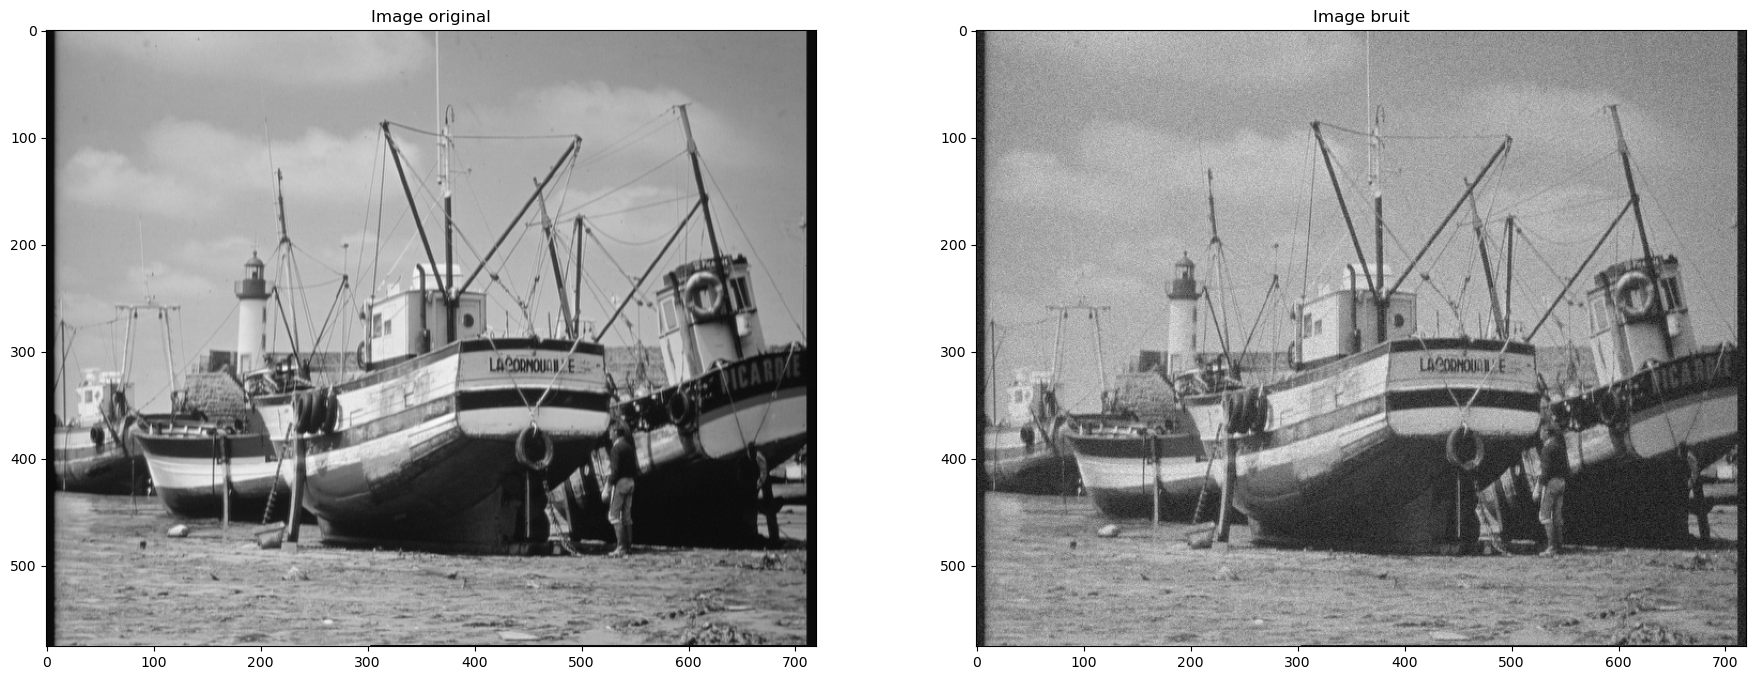

In [12]:
from scipy import signal
from skimage import restoration

img = io.imread( 'boats.bmp' )
img = img * 1.
sigma = 10.
img_noisy = img + sigma * np.random.randn(*img.shape)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(22,8))

axes[0].imshow(img, cmap=plt.get_cmap('gray'))
axes[0].set_title("Image original")

axes[1].imshow(img_noisy, cmap=plt.get_cmap('gray'))
axes[1].set_title("Image bruit")


filtre median: PSNR out: 31.32671790133734  SSIM out: 0.8242163190527035
filtre low pass: PSNR out: 30.77354506815713  SSIM out: 0.8494815939774248
filtre bil: PSNR out: 23.27488748317521  SSIM out: 0.6016497330782172


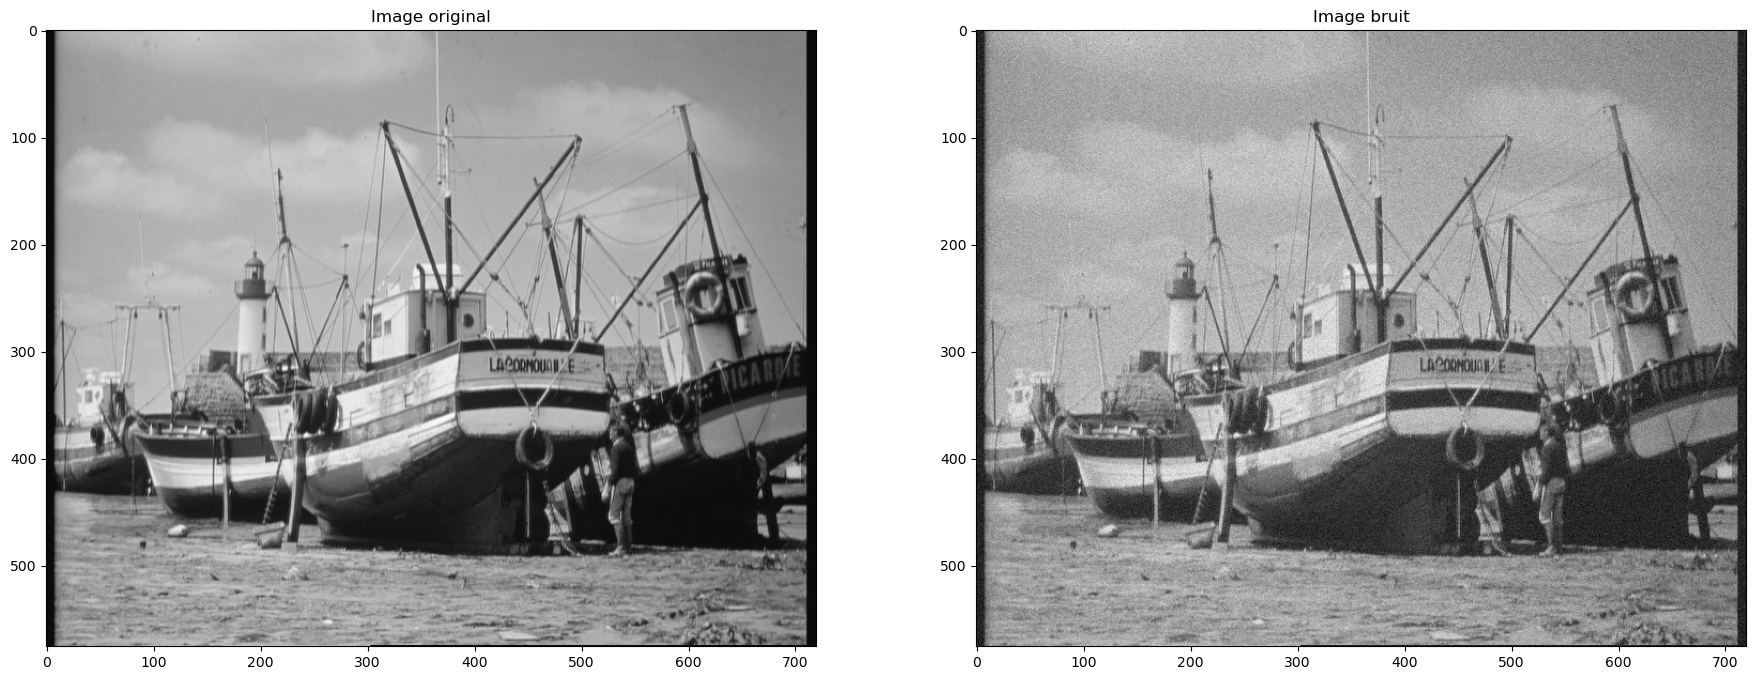

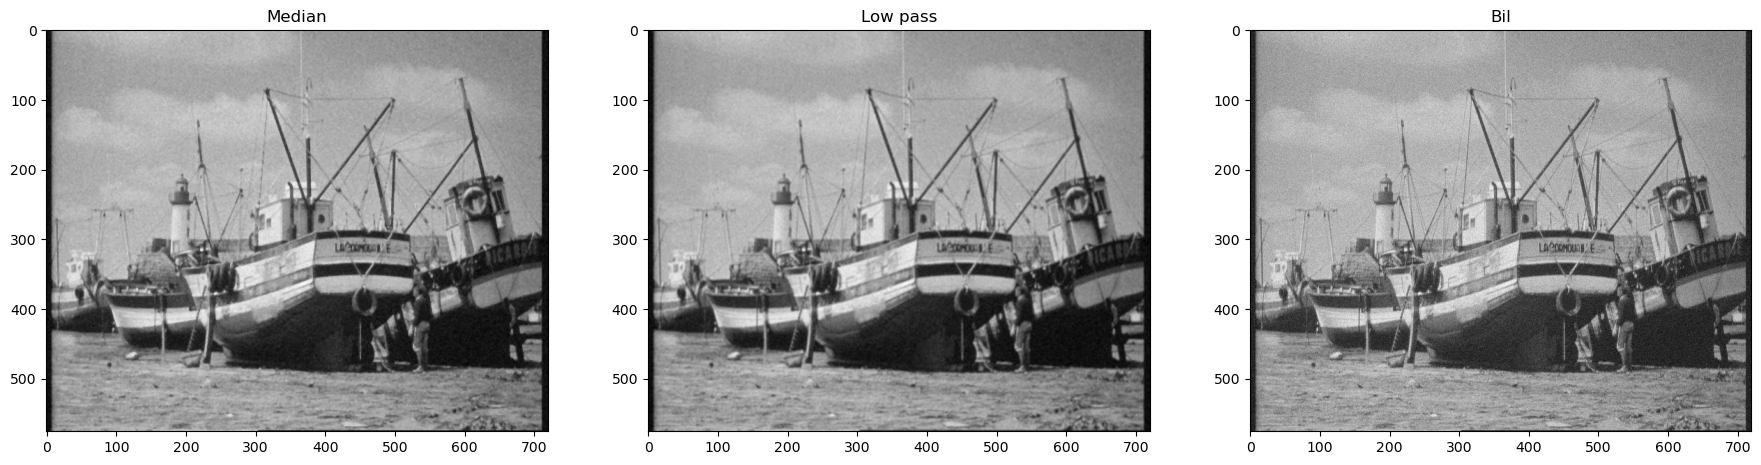

In [ ]:
from scipy import signal
from skimage import restoration

    #Original Image
img = io.imread( 'boats.bmp' )
#print(img.dtype) #uint8
img = img * 1.

    #Image with noise
sigma = 10.
img_noisy = img + sigma * np.random.randn(*img.shape) #/!\ la fonction np.random.randn rajoute des flottants positifs et négatifs, soit en dehors de la borne [0;255]. 
#print(img_noisy.dtype) #float64


    #Display images
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(22,8))

axes[0].imshow(img, cmap=plt.get_cmap('gray'))
axes[0].set_title("Image original")

axes[1].imshow(img_noisy, cmap=plt.get_cmap('gray'))
axes[1].set_title("Image bruit")


#-----------------Median filter-------------------#

img_denoised_med = median(img_noisy, np.ones((3, 3))) 


#-----------------Low pass filter----------------#

kernel= np.ones((3,3))/9 
img_denoised_lp = signal.convolve2d(img_noisy,kernel,boundary='symm',mode="same")

#-----------------Bilateral filter----------------#

img_denoised_bil = restoration.denoise_bilateral(img_noisy,sigma_color=0.1,sigma_spatial=1)
#print(img_denoised_bil)



    #Figure display

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(22,8))




axes[0].imshow(img_denoised_med, cmap=plt.get_cmap('gray'))
axes[0].set_title("Median")
axes[1].imshow(img_denoised_lp, cmap=plt.get_cmap('gray'))
axes[1].set_title("Low pass")
axes[2].imshow(img_denoised_bil, cmap=plt.get_cmap('gray'))
axes[2].set_title("Bil")



#Flottants ---> [0,255] 


img2 = np.uint8(img)
#print(img2.dtype)
#print(img2)


img_denoised_lp2 = np.uint8(img_denoised_lp) #Les flottants possitifs et négatifs sont arrondis à l'entier supérieur (positif)
#print(img_denoised_lp2.dtype)
#print(img_denoised_lp2)


img_denoised_med2 = np.uint8(img_denoised_med)
#print(img_denoised_med2.dtype)
#print(img_denoised_med2)


img_denoised_bil2 = np.uint8(img_denoised_bil)
#print(img_denoised_bil2)
#print(img_denoised_bil2.dtype)


# Calcul PSNR et SSIM

print('filtre median: PSNR out: ' + str(psnr(img2,img_denoised_med2)) + '  SSIM out: ' +  str(ssim(img2,img_denoised_med2)))
print('filtre low pass: PSNR out: ' + str(psnr(img2,img_denoised_lp2)) + '  SSIM out: ' + str(ssim(img2,img_denoised_lp2)))
print('filtre bil: PSNR out: ' + str(psnr(img2,img_denoised_bil2)) + '  SSIM out: ' + str(ssim(img2,img_denoised_bil2)))


#Les meilleurs filtres pour la terme de restauration sont le filtre médian et passe-bas en se basant sur le PNSR et le SSIM.



### Poisson-Gaussian noise (bonus)

A more realistic assumption accounts for Poisson noise, which is always present in images. The Poisson-Gaussian noise affecting a pixel $x$ can be written
$$ y \sim \gamma^{-1}\mathcal{P}(\gamma x) + \mathcal{N}(0,\sigma^2).$$

<span style='color:red'><b>Exercise 2 bis (bonus):</b></span> 
- Is this noise still additive?
- What is the variance of $y$?
- Explain why we can approximate this model by
$$y \sim x + \mathcal{N}(0,\sigma^2 + \gamma x).$$
- Simulate such a noise and apply NL-means. What can you observe on the estimated noise $\hat b$?

## 2. Image approximation and compression

We will now move to approximation and compression of images. We will apply some linear transforms such as DCT (discrete cosine transform) or DWT (discrete wavelet transform), and evaluate their performance in terms of image approximation.

Let us start by defining the DCT transform, its inverse and their block counterparts. We will then compute and display DCT and block-DCT on image *Barbara*. Since most of the energy is contained in the low frequencies, we will use a logarithmic display.

In [17]:
import scipy
import scipy.fftpack
from numpy import r_

# Define dct, idct, and block transforms
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

def block_dct2(im):
    imsize = im.shape
    dct = np.zeros(imsize)

    # Do 8x8 DCT on image (in-place)
    for i in r_[:imsize[0]:8]:
        for j in r_[:imsize[1]:8]:
            dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )
    return dct

def block_idct2(dct):
    imsize = dct.shape
    im = np.zeros(imsize)

    # Do 8x8 iDCT on image (in-place)
    for i in r_[:imsize[0]:8]:
        for j in r_[:imsize[1]:8]:
            im[i:(i+8),j:(j+8)] = idct2( dct[i:(i+8),j:(j+8)] )
    return im


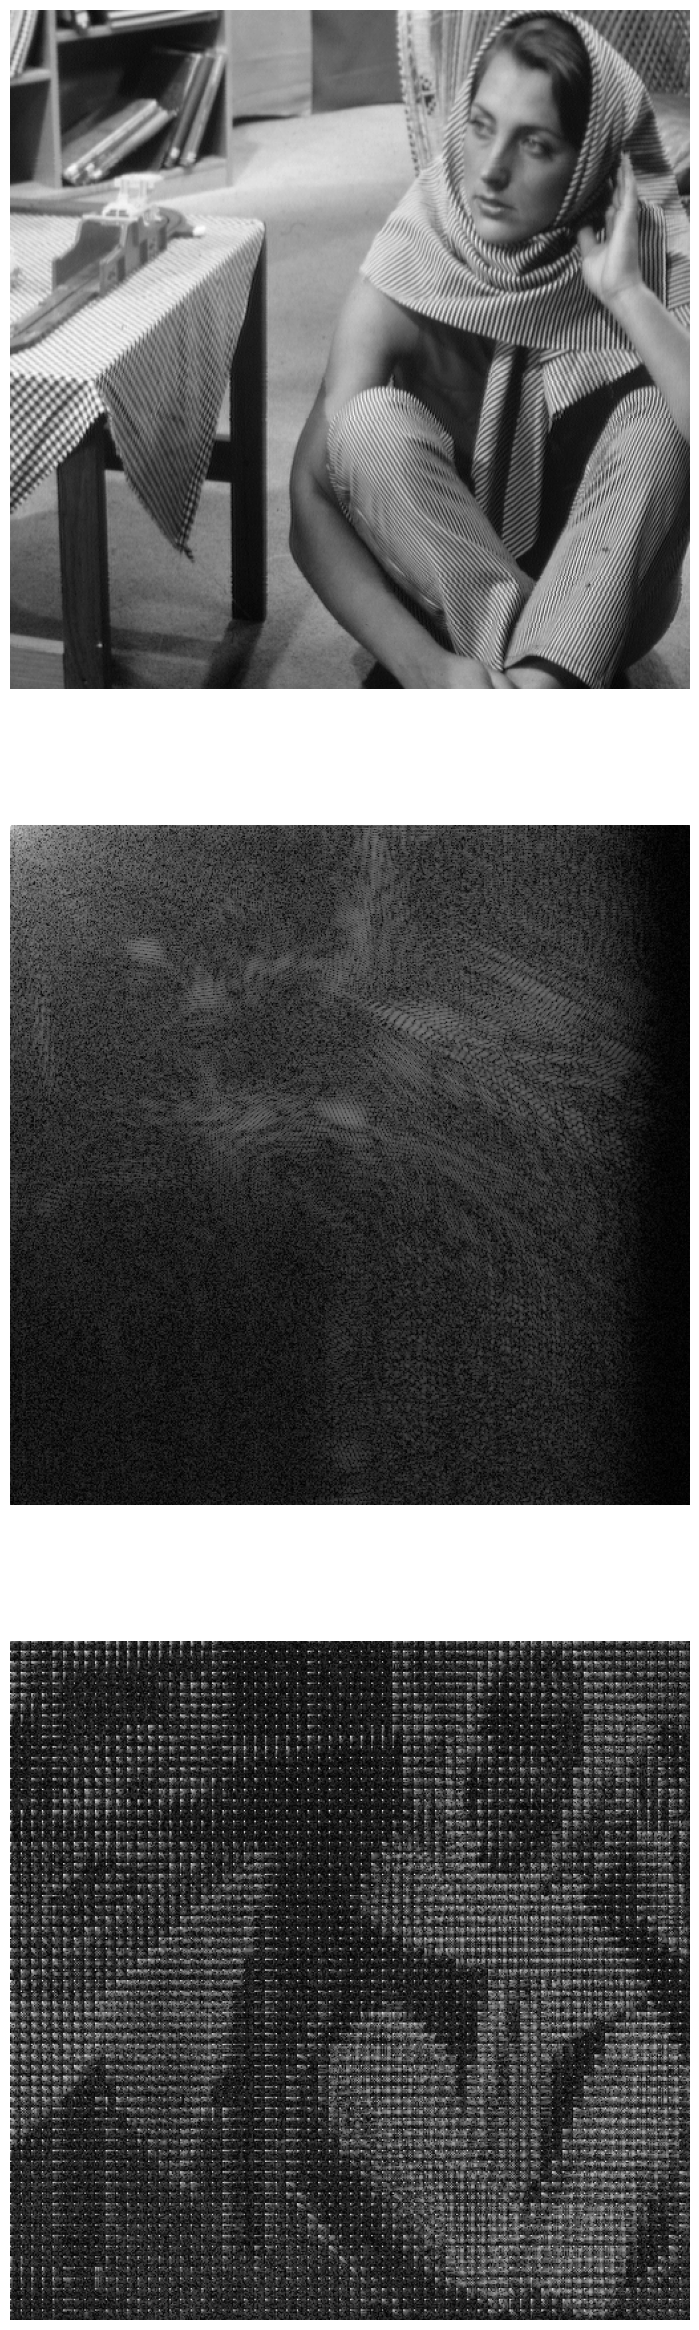

In [18]:
# Read the image
img = io.imread( 'barbara.pgm' )

# Compute DCT and block DCT
dct = dct2(img)
bdct = block_dct2(img)

# Display image and transforms
fig, axes = plt.subplots(nrows=3, figsize=(10,30))
axes[0].imshow(np.uint8(img), cmap=plt.get_cmap('gray'))
axes[1].imshow(np.log(1+np.abs(dct)), cmap=plt.get_cmap('gray'))
axes[2].imshow(np.log(1+np.abs(bdct)), cmap=plt.get_cmap('gray'))

# Turn off axes for all subplots
p = [axi.set_axis_off() for axi in axes.ravel()]

262144


The goal now is to approximate the image with few coefficients. To compare the different transformations, we will threshold the smallest coefficients, and see how this impacts the reconstruction of the image.

<span style='color:red'><b>Exercise 3:</b></span> 
- Set the the half smallest coefficients (in magnitude) to 0 for both transforms. Invert them, show the result and compute the PSNR and SSIM. You might use **np.median**.
- Do the same for other approximation rates (keep only 10% of the coefficients, then 20, 30, etc). You can use **np.quantile**. Show the usual metrics (PSNR and SSIM) as a function of the rate. Compare DCT and block DCT, and comment.
- (bonus) Do the same for a discrete wavelet transform.

 Cas 1 DCT : PSNR: 26.089572719068958  SSIM: 0.6961003680925489
 Cas 2 DCT par block PSNR: 28.18648811797076  SSIM: 0.8207959670558185


Text(0.5, 1.0, 'DCT par blocs')

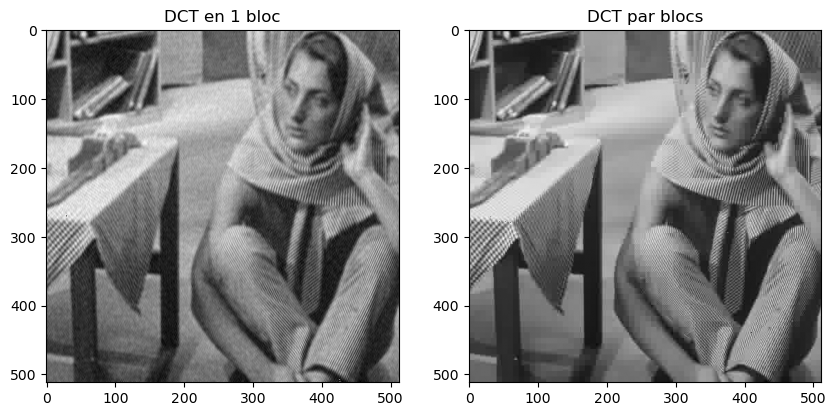

In [30]:
#Exo 3
img = io.imread( 'barbara.pgm' )

# Compute DCT and block DCT
dct = dct2(img)
# img = idct2(dct)
bdct = block_dct2(img)

#Quantization
q = 0.95                #On ne garde que 5% des coefficients les plus grands, pour le cas avec la médiane il suffit de mettre q = 0.5.


#------------------ Image 1 DCT-----------------#


selec = np.where(np.abs(dct)<np.quantile(np.abs(dct),q)) #Selection des 1/4 des coefficients les plus petits

dct[selec] = 0                                           #Mise à zéro des coefficients sélectionnés
img_r = idct2(dct)                                      #Dct en un bloc de l'image
img = np.uint8(img)
img_r = np.uint8(img_r)                                 #Dct inverse


#--------------Image 1 DCT par bloc------------#

imsize = img.shape
ibdct = np.zeros(imsize)
selec = np.where(np.abs(bdct)<np.quantile(np.abs(bdct),q))
bdct[selec] = 0


# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        k=bdct[i:(i+8),j:(j+8)]
        ibdct[i:(i+8),j:(j+8)] = idct2(k)


img_r2 = np.uint8(ibdct)      #Dct inverse de la Dct par bloc


#Display 
print(' Cas 1 DCT : PSNR: ' + str(psnr(img,img_r)) + '  SSIM: ' +  str(ssim(img,img_r)))
print(' Cas 2 DCT par block PSNR: ' + str(psnr(img,img_r2)) + '  SSIM: ' +  str(ssim(img,img_r2)))

fig, axes = plt.subplots(ncols=2, figsize=(10,10))

axes[0].imshow(img_r,cmap=plt.get_cmap('gray'))
axes[0].set_title("DCT en 1 bloc")
axes[1].imshow(img_r2,cmap=plt.get_cmap('gray'))
axes[1].set_title("DCT par blocs")


#La DCT par blocs offre une meilleure compression, semblable à la compression JPEG, car elle garde mieux l'information localement. 
# Cependant, lorsque q est trop élévé (ex q=0.99), un trop grand nombre de coefficients sont perdus (mise à zéro), ce qui dégrade fortement la qualité de l'image.
#  On voir l'apparition "d'applats", des blocs de pixels de mêmes valeurs. On s'apercoit alors de la limite de la compression du à la quantisation.





The goal now is to understand the  link with image compression. Recall than in compression by transformation, a transform is first applied to the image, and the coefficients are then quantized and losslessly coded. The more "concentrate" the image coefficients, the better the result.

<span style='color:red'><b>Exercise 4:</b></span> 
- Display a small sample of a JPEG image, such as the provided *flower.jpg*
- Show some blocks that appear because of the JPEG compression
- Where is the quantization the most problematic?

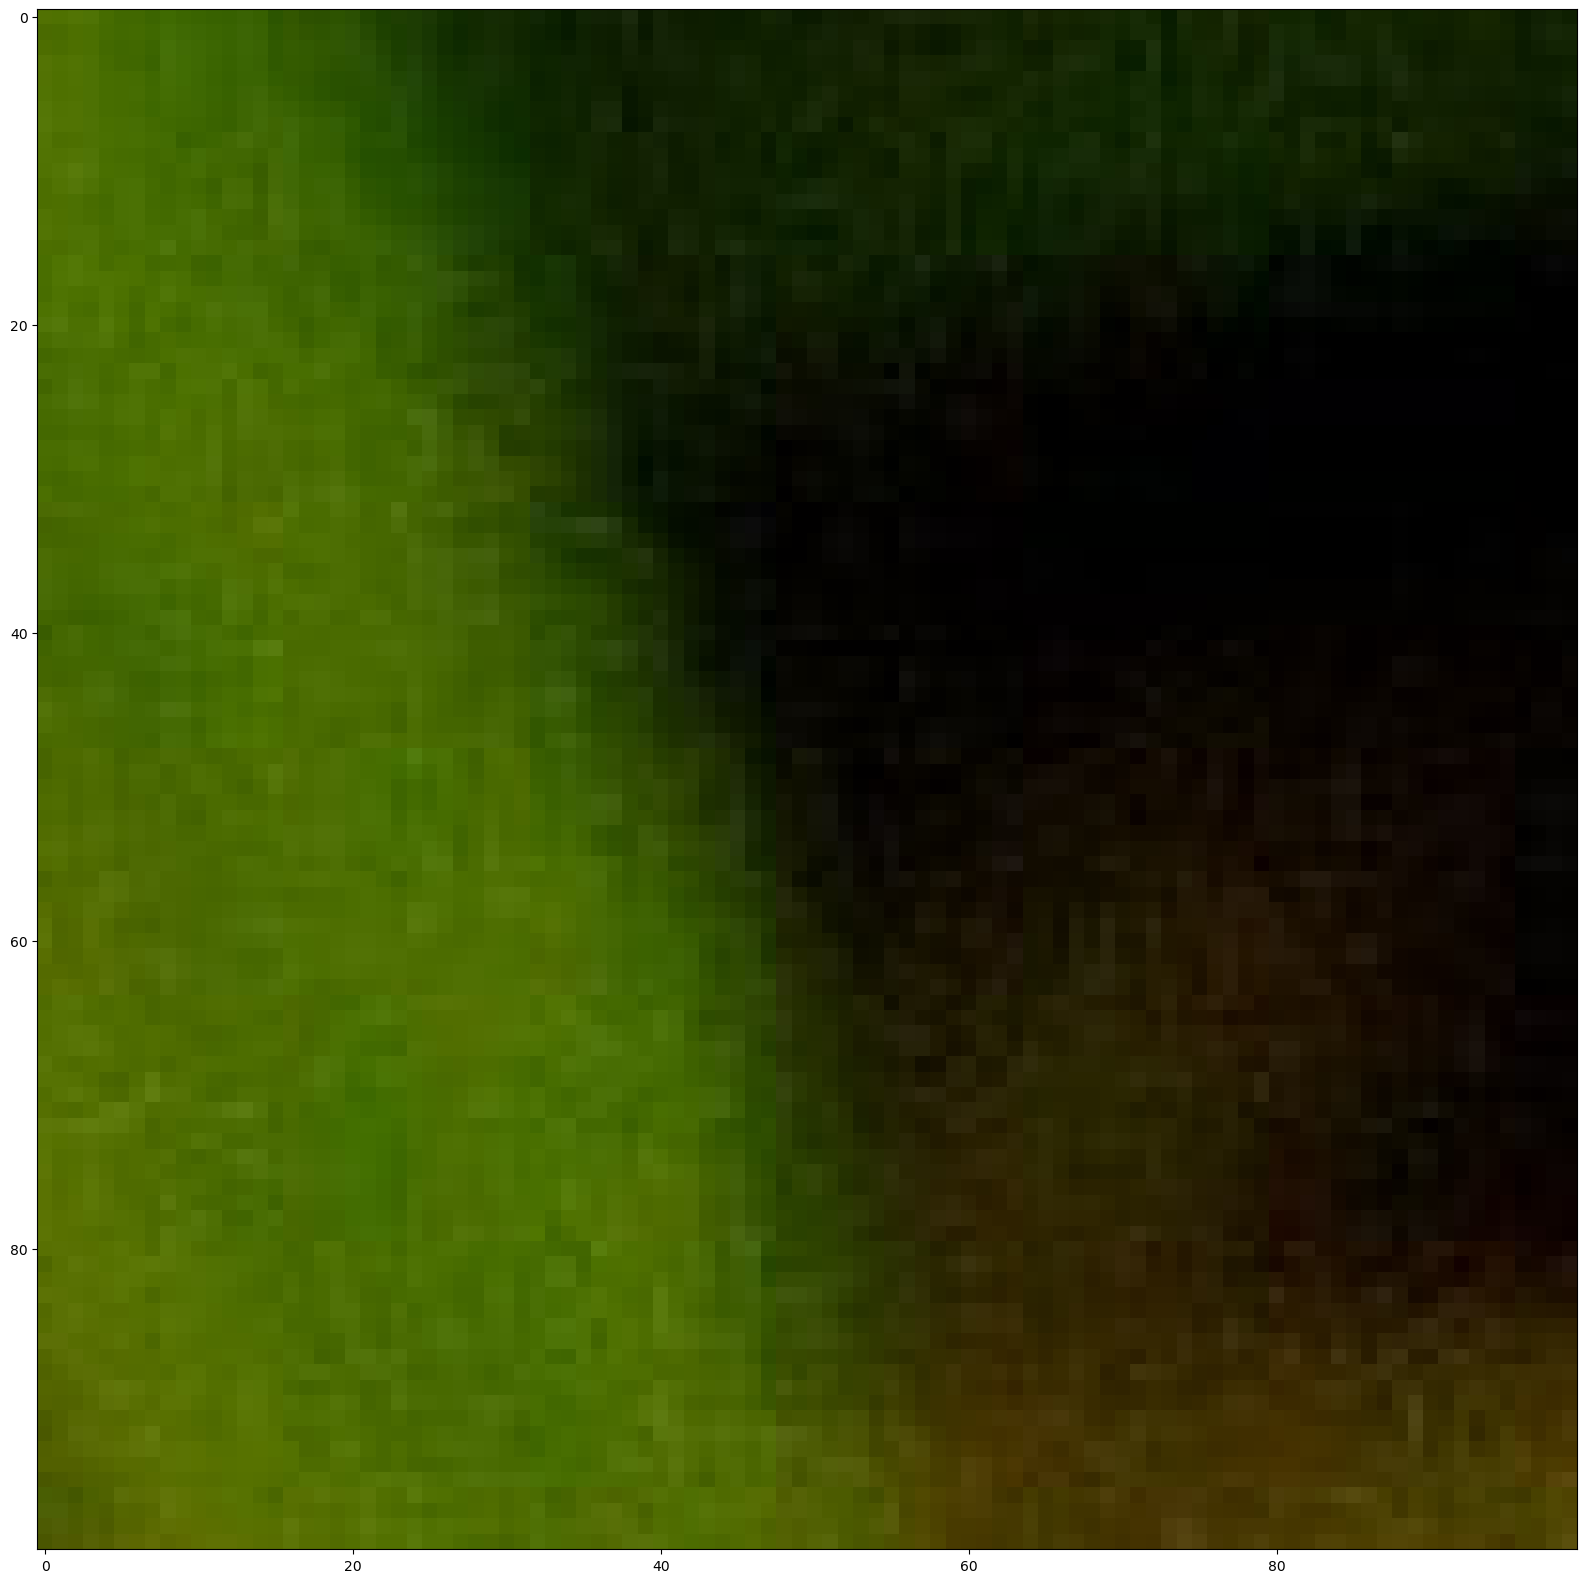

In [ ]:
img = io.imread( 'flower.jpg' )
x = 0
y = 0
dx = 100
dy = 100
fig, axes = plt.subplots(ncols=1, figsize=(20,20))
axes.imshow(img[x:x+dx,y:y+dy,:])


#L'augmentation de la quantisation dégrade la précision et les détails de l'image par la pertes des variations fines des coefficients.
#On observe moins bien les textures, caractérisés notamment par l'applat des couleurs.